![](Images/2022-11-28-14-53-21.png)

In [22]:
# import libraries
import pyomo.environ as pyo
import matplotlib.pyplot as plt
import random

## Good practice
Initialize the parameters from uniform distribution and if the solution not in zero don't start with zero, just start with small number like 0.0001

In [43]:
# initialize the model
model = pyo.AbstractModel()

# initialize the parameters and the variables
model.N = pyo.Param(mutable=True, default=50)
model.I = pyo.RangeSet(1, model.N)
model.J = pyo.Set(initialize=model.I)

model.R = pyo.Var(bounds=(0.001,1), within=pyo.NonNegativeReals, initialize=random.uniform(0.001,1))
model.x = pyo.Var(model.I, bounds=(0.001,2), within=pyo.NonNegativeReals, initialize=random.uniform(0.001,1))
model.y = pyo.Var(model.I, bounds=(0.001,2), within=pyo.NonNegativeReals, initialize=random.uniform(0.001,1))

# Constraint Declarations
def con_1_rule(model, i , j):
    if i > j:
        return (model.x[i] - model.x[j])**2 + (model.y[i] - model.y[j])**2 >= (2* model.R)**2
    else:
        return pyo.Constraint.Skip
model.c1 = pyo.Constraint(model.I, model.J, rule = con_1_rule)

def con_2_rule(model, i):
    return (model.x[i]- 1)**2 + (model.y[i]- 1)**2 <= (1-model.R)**2
model.c2 = pyo.Constraint(model.I, rule=con_2_rule)

# Declare the objective
model.OF = pyo.Objective(expr= model.R , sense=pyo.maximize)

# Define the solver
solver = pyo.SolverFactory('ipopt')
instance = model.create_instance()
results = solver.solve(instance)

# write the results
results.write()

    mutable Param).  The linkage between this RangeSet and the original source
    data will be broken, so updating the data value in the future will not be
    reflected in this RangeSet.  To suppress this warning, explicitly convert
    the source data to a constant type (e.g., float, int, or immutable Param)
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 1275
  Number of variables: 101
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.11.1\x3a Optimal Soluti

R:  0.1245845704405799


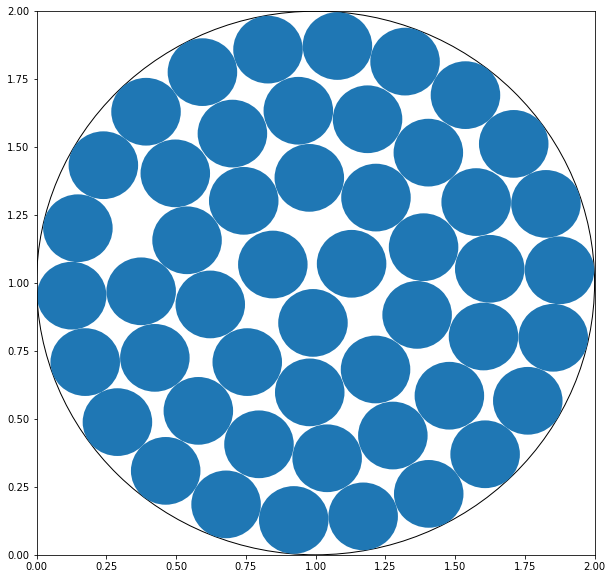

In [44]:
plt.figure(figsize=(10,10))
ax = plt.subplot()


unity_circle = plt.Circle((1,1), 1, fill = False)
ax.add_patch(unity_circle)
plt.xlim(0,2)
plt.ylim(0,2)

R = pyo.value(instance.R)
for i in instance.I:
    x_i = pyo.value(instance.x[i])
    y_i = pyo.value(instance.y[i])
    cir = plt.Circle((x_i, y_i), R)
    ax.add_patch(cir)
print('R: ', R)